### K-NEAREST-NEIGHBORS

In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [3]:
INFOSYS= pd.read_csv("D:/predict/data_techcom.csv")
INFOSYS = INFOSYS.dropna()
INFOSYS = INFOSYS[['Date','Open', 'High', 'Low','Close','chance_price','percent_change' ,'Volume']]
INFOSYS.head()

,Date,Open,High,Low,Close,chance_price,percent_change,Volume
0,2024-05-21,48100.00,48200.00,47050.00,47200.00,-1000,-0.02,11258500
1,2024-05-20,48442.45,48975.86,48054.53,48200.00,-50,0.00,11449601
2,2024-05-17,48248.49,48490.95,48151.51,48248.49,-150,0.00,6610750
3,2024-05-16,47036.22,48442.45,46939.24,48393.96,1800,0.04,21363102
4,2024-05-15,46454.33,46696.78,46308.85,46648.29,200,0.00,10026100


In [4]:
INFOSYS.describe()

,Open,High,Low,Close,chance_price,percent_change,Volume
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,35109.575150,35570.969640,34649.655380,35087.775620,-1.552000,0.000230,1.147617e+07
std,10126.757555,10239.304332,10016.929996,10109.106232,727.708741,0.021239,8.514470e+06
min,17650.700000,17844.670000,16971.830000,17602.210000,-3685.000000,-0.080000,7.066300e+05
25%,27239.787500,27639.840000,26742.755000,27154.930000,-350.000000,-0.010000,5.653875e+06
50%,33531.485000,34161.875000,32973.840000,33507.240000,0.000000,0.000000,9.064233e+06
75%,45981.542500,46587.677500,45399.652500,45933.052500,350.000000,0.010000,1.514422e+07
max,56055.530000,56831.390000,53921.930000,56249.500000,3103.000000,0.150000,7.498292e+07


In [5]:
INFOSYS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1000 non-null   object 
 1   Open            1000 non-null   float64
 2   High            1000 non-null   float64
 3   Low             1000 non-null   float64
 4   Close           1000 non-null   float64
 5   chance_price    1000 non-null   int64  
 6   percent_change  1000 non-null   float64
 7   Volume          1000 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 62.6+ KB


In [6]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [7]:
layout = go.Layout(
    title='STOCK PRICE OF INFOSYS',
        xaxis=dict(
            title='date',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='blue'
            )
        ),
        yaxis=dict(
            title='Price',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='red'
        )
    )
)
INFOSYS_DATA = [{'x':INFOSYS['Date'], 'y':INFOSYS['Close']}]
plot = go.Figure(data=INFOSYS_DATA, layout=layout)

In [8]:
iplot(plot)

In [9]:
INFOSYS['Open-Close']= INFOSYS.Close - INFOSYS.Open
INFOSYS['High-Low']  = INFOSYS.High - INFOSYS.Low
INFOSYS = INFOSYS.dropna()
X= INFOSYS[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
0,-900.00,1150.00
1,-242.45,921.33
2,0.00,339.44
3,1357.74,1503.21
4,193.96,387.93


In [10]:
Y= np.where(INFOSYS['Close'].shift(-1)>INFOSYS['Close'],1,-1)

In [11]:
split_percentage = 0.7
split = int(split_percentage*len(INFOSYS))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

In [12]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train, Y_train)

accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.84
Test_data Accuracy: 0.84


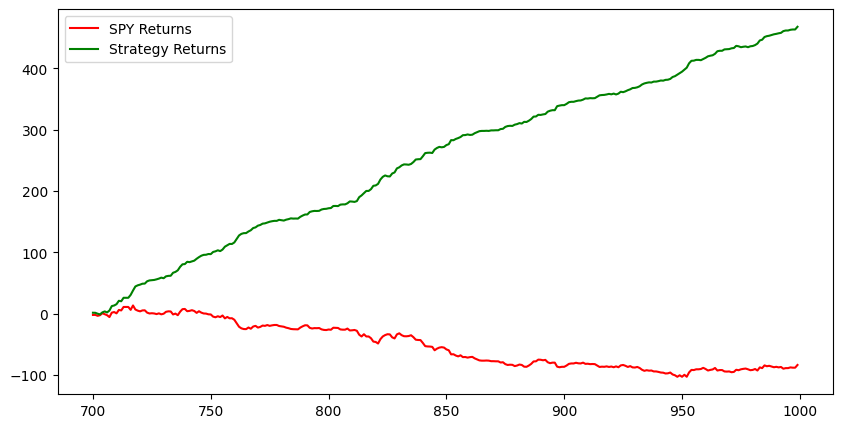

In [13]:
INFOSYS['Predicted_Signal'] = knn.predict(X)

INFOSYS['SPY_returns'] = np.log(INFOSYS['Close']/INFOSYS['Close'].shift(1))
Cumulative_SPY_returns = INFOSYS[split:]['SPY_returns'].cumsum()*100
 
INFOSYS['Startegy_returns'] = INFOSYS['SPY_returns']* INFOSYS['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = INFOSYS[split:]['Startegy_returns'].cumsum()*100

plt.figure(figsize=(10,5))
plt.plot(Cumulative_SPY_returns, color='r',label = 'SPY Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

In [14]:
Std = Cumulative_Strategy_returns.std()
Sharpe = (Cumulative_Strategy_returns-Cumulative_SPY_returns)/Std
Sharpe = Sharpe.mean()
print ('Sharpe ratio: %.2f'%Sharpe )

Sharpe ratio: 2.28


In [15]:
model = knn.fit(X_train, Y_train)
model = model.fit (X_train,Y_train)

In [16]:
probability = model.predict_proba(X_test)
print(probability)

[[0.8        0.2       ]
 [0.26666667 0.73333333]
 [0.53333333 0.46666667]
 [0.         1.        ]
 [1.         0.        ]
 [0.33333333 0.66666667]
 [1.         0.        ]
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.46666667 0.53333333]
 [0.         1.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.8        0.2       ]
 [0.8        0.2       ]
 [0.06666667 0.93333333]
 [0.33333333 0.66666667]
 [1.         0.        ]
 [0.93333333 0.06666667]
 [0.26666667 0.73333333]
 [0.93333333 0.06666667]
 [0.73333333 0.26666667]
 [0.33333333 0.66666667]
 [0.8        0.2       ]
 [1.         0.        ]
 [0.06666667 0.93333333]
 [0.2        0.8       ]
 [0.66666667 0.33333333]
 [1.         0.        ]
 [0.13333333 0.86666667]
 [1.         0.        ]
 [0.         1.        ]
 [0.26666667 0.73333333]
 [0.26666667 0.73333333]
 [1.         0.        ]


In [17]:
predicted = model.predict(X_test)

In [18]:
from sklearn import metrics

In [19]:
print(metrics.confusion_matrix(Y_test, predicted))

[[152  28]
 [ 20 100]]


In [20]:
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

          -1       0.88      0.84      0.86       180
           1       0.78      0.83      0.81       120

    accuracy                           0.84       300
   macro avg       0.83      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



In [21]:
print(model.score(X_train,Y_train))

0.8414285714285714


### ACCURACY OF TRAINING MODEL FOR INFOSYS STOCK MARKET PRICE PREDICTION IS ABOUT 84%.